## Perform EDA Analysis

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the wine dataset
from sklearn.datasets import load_wine

In [3]:
#Load the wine dataset and print the description of the dataset
wine_dataset = load_wine()
print (wine_dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
#Print the keys of the dataset
print(wine_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [5]:
#Print the type of the dataset
print(type(wine_dataset.data))

<class 'numpy.ndarray'>


In [6]:
#Print the shape of the dataset
print(wine_dataset.data.shape)

(178, 13)


The dataset has 178 rows and 13 columns

In [7]:
#Print the column names and the type of the columns of the dataset

#Print the feature column
print(wine_dataset.feature_names)
print(type(wine_dataset.feature_names))

#Print the target column
print(wine_dataset.target_names)
print(type(wine_dataset.target_names))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
<class 'list'>
['class_0' 'class_1' 'class_2']
<class 'numpy.ndarray'>


In [8]:
#Print the data to see how it is being stored
print(wine_dataset)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [9]:
#Store the data into dataframe for easy readability
df = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)
df['Target'] = pd.Series(wine_dataset.target)
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  Target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

In [10]:
#Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

In [11]:
#Displays output of describe function and converting values that are displayed from scientific notation to normal numeric values
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

alcohol malic_acid        ash alcalinity_of_ash  magnesium  \
count  178.00000  178.00000  178.00000         178.00000  178.00000   
mean    13.00062    2.33635    2.36652          19.49494   99.74157   
std      0.81183    1.11715    0.27434           3.33956   14.28248   
min     11.03000    0.74000    1.36000          10.60000   70.00000   
25%     12.36250    1.60250    2.21000          17.20000   88.00000   
50%     13.05000    1.86500    2.36000          19.50000   98.00000   
75%     13.67750    3.08250    2.55750          21.50000  107.00000   
max     14.83000    5.80000    3.23000          30.00000  162.00000   

      total_phenols flavanoids nonflavanoid_phenols proanthocyanins  \
count     178.00000  178.00000            178.00000       178.00000   
mean        2.29511    2.02927              0.36185         1.59090   
std         0.62585    0.99886              0.12445         0.57236   
min         0.98000    0.34000              0.13000         0.41000   
25%         1.74250    1.20500              0.27000         1.25000   
50%         2.35500    2.13500              0.34000         1.55500   
75%         2.80000    2.87500              0.43750         1.95000   
max         3.88000    5.08000              0.66000         3.58000   

      color_intensity        hue od280/od315_of_diluted_wines     proline  \
count       178.00000  178.00000                    178.00000   178.00000   
mean          5.05809    0.95745                      2.61169   746.89326   
std           2.31829    0.22857                      0.70999   314.90747   
min           1.28000    0.48000                      1.27000   278.00000   
25%           3.22000    0.78250                      1.93750   500.50000   
50%           4.69000    0.96500                      2.78000   673.50000   
75%           6.20000    1.12000                      3.17000   985.00000   
max          13.00000    1.71000                      4.00000  1680.00000   

          Target  
count  178.00000  
mean     0.93820  
std      0.77503  
min      0.00000  
25%      0.00000  
50%      1.00000  
75%      2.00000  
max      2.00000

In [13]:
#Check if any variable contains missing values
#It will return TRUE beside the column that contains missing values
df.isnull().any(axis=0)

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
Target                          False
dtype: bool

In [14]:
#Check if there are any duplicated rows
df.duplicated().sum()

0

There are no missing or duplicate views.

## Plot EDA Plot and Perform K-means Clustering

In [15]:
#Get independent variables for dataset X
x = df.drop(columns=['Target'])

#Get target variable for dataset Y
y = df[['Target']]

display(x.head())
display(y.head())

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

Target
0       0
1       0
2       0
3       0
4       0

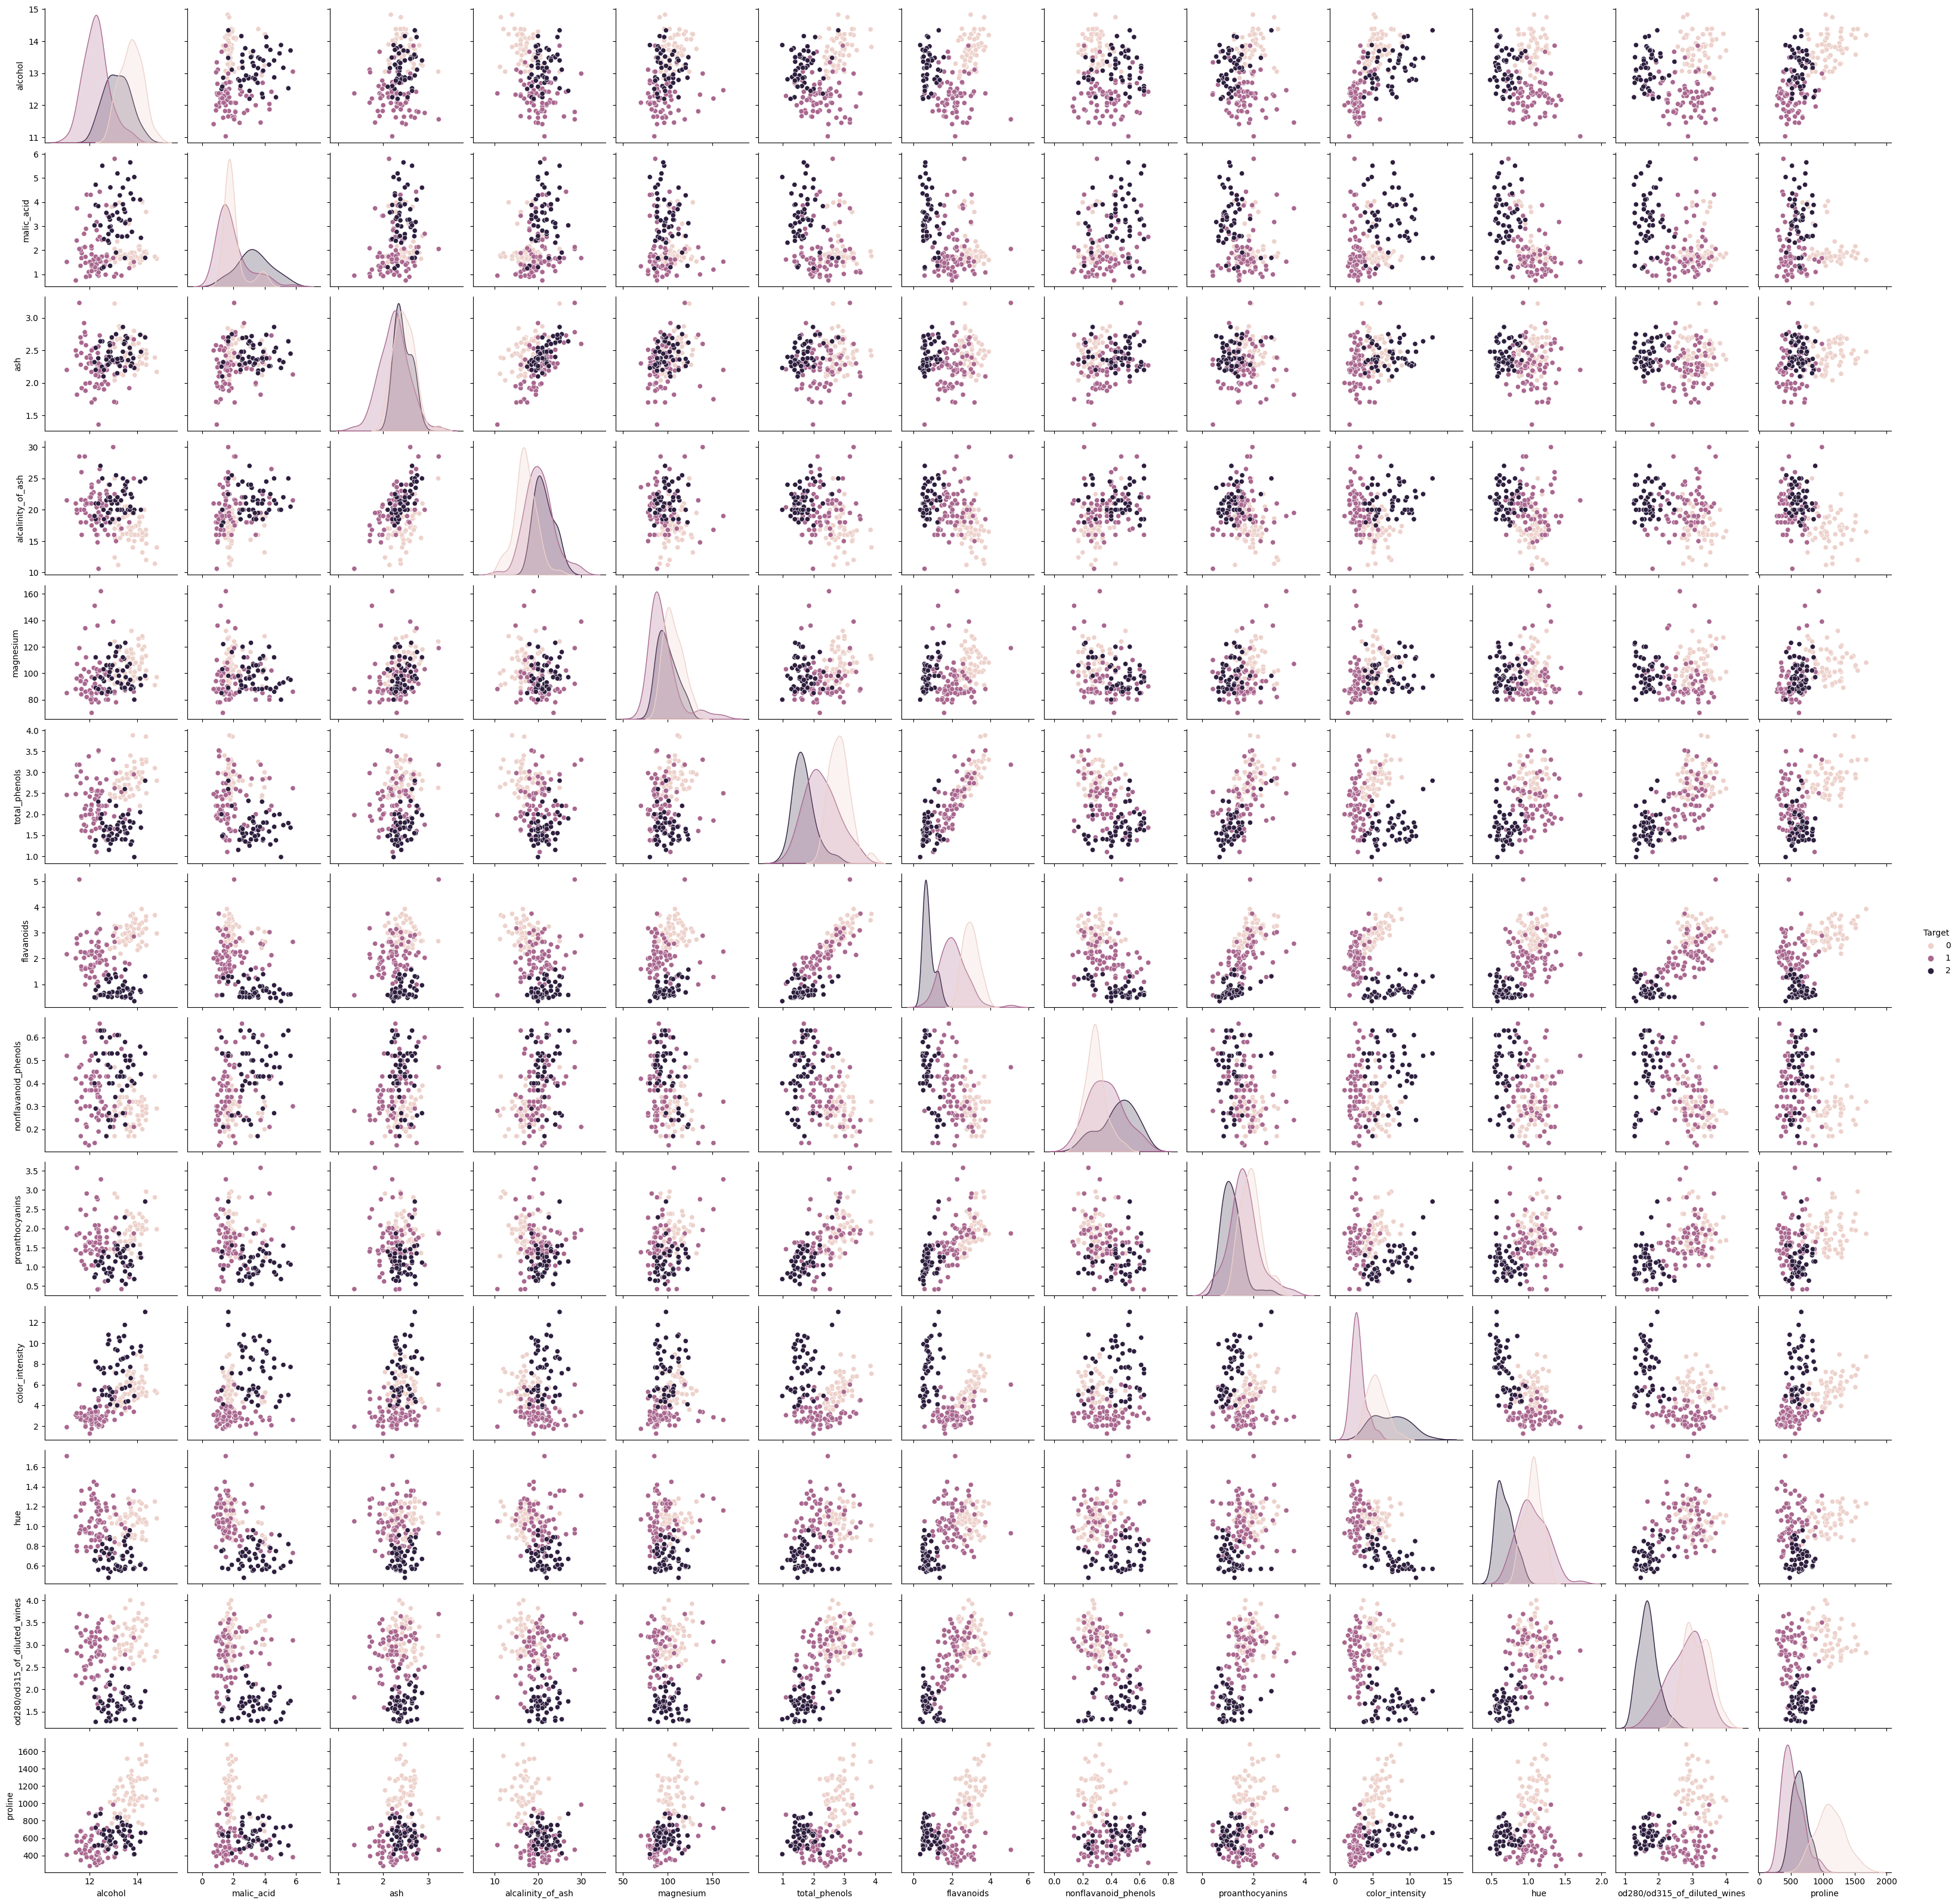

In [16]:
#Plot EDA plot
x['Target'] = y
sns.pairplot(x, hue='Target')

In [17]:
X_train = wine_dataset.data # features
Y = wine_dataset.target #target
(n_samples , n_features) = X_train.shape #n_samples is the #rows, n_features is the #cols
n_labels = len(wine_dataset.target_names) #no. of labels for the target

In [18]:
print(f"The labels are {wine_dataset.target_names}")

The labels are ['class_0' 'class_1' 'class_2']


In [19]:
print(f"# digits: {n_labels}; # samples: {n_samples}; # features {n_features}")

# digits: 3; # samples: 178; # features 13


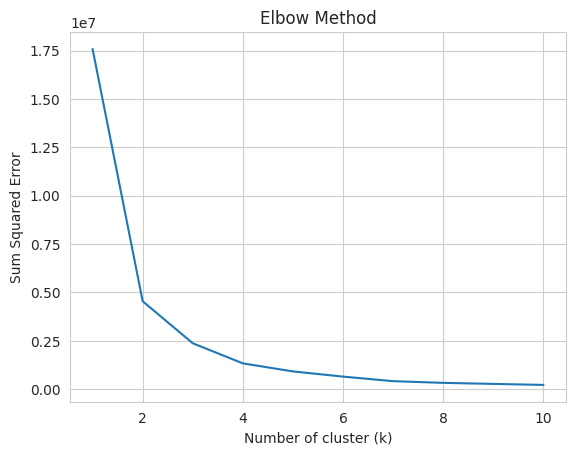

In [20]:
#Use the elbow method to estimate the clusters needed and it can be compared with the performance metrics to see if the results are aligned

#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
	km = KMeans(n_clusters=k, random_state=0)
	km.fit(X_train)
	sse.append(km.inertia_)

sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

From the elbow method it can be seen that the number of clusters can be 2 or 3 but the elbow-like shape is more at 2.

Lets estimate the number of clusters needed using the performance metrics to compare the results derived from the elbow method

In [21]:
cluster_size = [2, 3, 5, 10, 15, 20, 25]
scores = []
for cs in cluster_size:
  kmeans = KMeans(n_clusters=cs)
  kmeans.fit(X_train)

  cluster_labels = kmeans.labels_

  SH = metrics.silhouette_score(X_train, cluster_labels)
  CH = metrics.calinski_harabasz_score(X_train, cluster_labels)
  DB = metrics.davies_bouldin_score(X_train, cluster_labels)
  scores.append([cs, SH, CH, DB]) #store the cluster size and scores for each cluster

result = pd.DataFrame(scores, columns = ['size','SH','CH','DB'])
result

size        SH           CH        DB
0     2  0.656854   505.429310  0.478784
1     3  0.571138   561.815658  0.534243
2     5  0.548999   787.046922  0.545047
3    10  0.518789  1476.619992  0.537168
4    15  0.501007  1815.474166  0.523098
5    20  0.469444  2137.582150  0.633186
6    25  0.454825  2080.290719  0.648333

For silhouette coefficient (SH), the higher the value is closest to 1, the better. If the value is closer to zero, it means that the clustering is incorrect. Based on the dataframe above, k=2 provides better clustering as it is closer to 1

For Calinski-Harabasz (CH), the higher the value, the better it is for clustering. Based on the dataframe above, k=6 is better for clustering.

For Davies-Bouldin (DB), the lower the value, the better it is for clustering. Based on the dataframe above, k=2 provides better clustering as it is closer to zero.

In conclusion, K=2 is chosen based on SH and DB

In [22]:
#Apply PCA
pca2 = PCA(n_components=2)
Xtrain_red2 = pd.DataFrame(pca2.fit_transform(X_train))
Xtrain_red2

0          1
0    318.562979  21.492131
1    303.097420  -5.364718
2    438.061133  -6.537309
3    733.240139   0.192729
4    -11.571428  18.489995
..          ...        ...
173   -6.980211  -4.541137
174    3.131605   2.335191
175   88.458074  18.776285
176   93.456242  18.670819
177 -186.943190  -0.213331

[178 rows x 2 columns]

In [23]:
cluster_size = [2, 3, 5, 10, 15, 20, 25]
scores = []
for cs in cluster_size:
  kmeans = KMeans(n_clusters=cs)
  kmeans.fit(Xtrain_red2)

  cluster_labels = kmeans.labels_

  SH = metrics.silhouette_score(X_train, cluster_labels)
  CH = metrics.calinski_harabasz_score(X_train, cluster_labels)
  DB = metrics.davies_bouldin_score(X_train, cluster_labels)
  scores.append([cs, SH, CH, DB]) #store the cluster size and scores for each cluster

result = pd.DataFrame(scores, columns = ['size','SH','CH','DB'])
result

size        SH           CH        DB
0     2  0.656854   505.429310  0.478784
1     3  0.571138   561.815658  0.534243
2     5  0.548999   787.046922  0.545047
3    10  0.521272  1488.144194  0.542932
4    15  0.490161  1805.876100  0.543062
5    20  0.458329  2011.561080  0.626925
6    25  0.448156  2175.519742  0.621490

K-Means Clustering (PCA)

For silhouette coefficient (SH), the higher the value is closest to 1, the better. If the value is closer to zero, it means that the clustering is incorrect. Based on the dataframe above, k=2 provides better clustering as it is closer to 1

For Calinski-Harabasz (CH), the higher the value, the better it is for clustering. Based on the dataframe above, k=6 is better for clustering.

For Davies-Bouldin (DB), the lower the value, the better it is for clustering. Based on the dataframe above, k=2 provides better clustering as it is closer to zero.

Both K-means with and without PCA, achieve the same results from the various performance metrics.

In conclusion, K=2 is chosen based on SH and DB

K-Means Clustering (2 clusters)

In [24]:
#select 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(Xtrain_red2)

cluster_labels = kmeans.labels_

SH = metrics.silhouette_score(X_train, cluster_labels)
CH = metrics.calinski_harabasz_score(X_train, cluster_labels)
DB = metrics.davies_bouldin_score(X_train, cluster_labels)

print ("Silhouette Score : ", SH)
print ("Calinski Harabasz Score : ", CH)
print ("Davies Bouldin Score : ", DB)

Silhouette Score :  0.6568536504294317
Calinski Harabasz Score :  505.4293097478468
Davies Bouldin Score :  0.478783575914202


In [25]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
reduced_data = Xtrain_red2.to_numpy()
h = 0.2     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
#generate sample points in x and y axis in steps of h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [28]:
X1 = Xtrain_red2
X1['Y'] = pd.DataFrame(Y)
X1.columns = ['x','y','target']
X1.head()

x          y  target
0  318.562979  21.492131       0
1  303.097420  -5.364718       0
2  438.061133  -6.537309       0
3  733.240139   0.192729       0
4  -11.571428  18.489995       0

<Axes: xlabel='x', ylabel='y'>

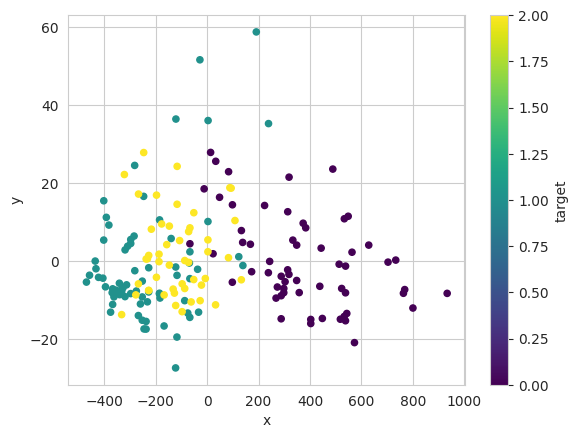

In [29]:
import matplotlib.pyplot as plt
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel coverts mesh to a sequence

# Put the result into a color plot
Z = Z.reshape(xx.shape) #recovert back the predicted values to mesh format
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            c="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#plt.scatter(X1,x='x',y='y',c='target',colormap='viridis')
X1.plot.scatter(x='x',y='y',c='target',colormap='viridis')